In [9]:
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Conv1D, Dropout, MaxPooling1D
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pyplot as plt

from attention import Attention

In [10]:
from tensorflow.keras.datasets import reuters

(X_train, y_train),(X_test, y_test) = reuters.load_data(num_words=1000, test_split=0.2) # num_words 빈도 수 num_words 이상 반복되는 단어
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
X_train = sequence.pad_sequences(X_train, maxlen=500)
X_test = sequence.pad_sequences(X_test, maxlen=500)

(8982,) (8982,) (2246,) (2246,)


In [11]:
model = Sequential()
model.add(Embedding(5000, 500))         # 단어 Embadding
model.add(Conv1D(64, 4, padding='valid', activation='relu', strides=1))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(55, return_sequences=True))   # return_sequences=True 해야 Attention 할 수 있음
model.add(Attention())
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, None, 500)         2500000   
                                                                 
 conv1d_4 (Conv1D)           (None, None, 64)          128064    
                                                                 
 dropout_4 (Dropout)         (None, None, 64)          0         
                                                                 
 max_pooling1d_4 (MaxPooling  (None, None, 64)         0         
 1D)                                                             
                                                                 
 lstm_3 (LSTM)               (None, None, 55)          26400     
                                                                 
 attention_2 (Attention)     (None, 128)               17105     
                                                      

In [12]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_loss', patience=5)
history = model.fit(X_train, y_train, epochs=100, batch_size=40, validation_split=0.25, callbacks=[early_stop])

Epoch 1/100
169/169 [==============================] - 61s 346ms/step - loss: -179.1858 - accuracy: 0.0490 - val_loss: -276.8657 - val_accuracy: 0.0450
Epoch 2/100
169/169 [==============================] - 58s 344ms/step - loss: -365.9555 - accuracy: 0.0491 - val_loss: -450.9612 - val_accuracy: 0.0450
Epoch 3/100
169/169 [==============================] - 58s 345ms/step - loss: -539.3693 - accuracy: 0.0491 - val_loss: -622.2582 - val_accuracy: 0.0450
Epoch 4/100
169/169 [==============================] - 60s 352ms/step - loss: -711.0082 - accuracy: 0.0491 - val_loss: -792.1807 - val_accuracy: 0.0450
Epoch 5/100
169/169 [==============================] - 58s 345ms/step - loss: -881.6450 - accuracy: 0.0491 - val_loss: -961.4363 - val_accuracy: 0.0450
Epoch 6/100
169/169 [==============================] - 58s 345ms/step - loss: -1052.3541 - accuracy: 0.0491 - val_loss: -1130.9781 - val_accuracy: 0.0450
Epoch 7/100
169/169 [==============================] - 59s 348ms/step - loss: -1222.23

Epoch 54/100
169/169 [==============================] - 102s 602ms/step - loss: -9182.5264 - accuracy: 0.0491 - val_loss: -9210.2471 - val_accuracy: 0.0450
Epoch 55/100
169/169 [==============================] - 102s 605ms/step - loss: -9352.1748 - accuracy: 0.0491 - val_loss: -9378.6377 - val_accuracy: 0.0450
Epoch 56/100
169/169 [==============================] - 104s 613ms/step - loss: -9521.3896 - accuracy: 0.0491 - val_loss: -9547.6885 - val_accuracy: 0.0450
Epoch 57/100
169/169 [==============================] - 104s 616ms/step - loss: -9690.8330 - accuracy: 0.0491 - val_loss: -9715.3037 - val_accuracy: 0.0450
Epoch 58/100
169/169 [==============================] - 102s 605ms/step - loss: -9860.4443 - accuracy: 0.0491 - val_loss: -9883.7393 - val_accuracy: 0.0450
Epoch 59/100
169/169 [==============================] - 101s 600ms/step - loss: -10030.0225 - accuracy: 0.0491 - val_loss: -10051.8477 - val_accuracy: 0.0450
Epoch 60/100
169/169 [==============================] - 98s 58

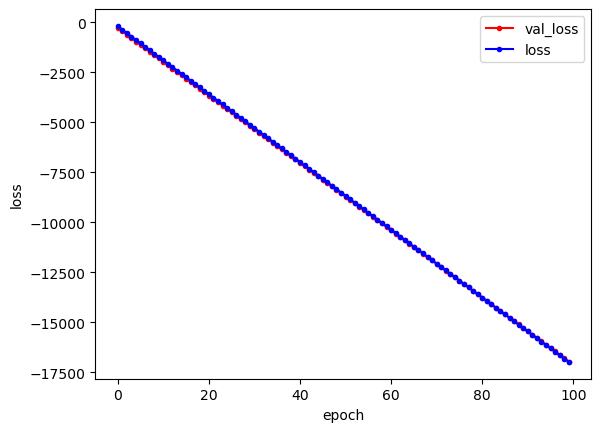

In [13]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']
x_num = np.arange(len(y_vloss))

plt.plot(x_num, y_vloss, marker='.', c='red', label='val_loss')
plt.plot(x_num, y_loss, marker='.', c='blue', label='loss')
plt.legend(loc='best')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()